### Goal: This project is on using a multi-class approach to predict the the outcomes of patients with cirrhosis.

Lets Explore our dataset before starting our goal.
:

Status is the categorical target; C (censored) indicates the patient was alive at N_Days, CL indicates the patient was alive at N_Days due to liver a transplant, and D indicates the patient was deceased at N_Days

A img is thus attached for detailed desription of the cirhossis dataset

# 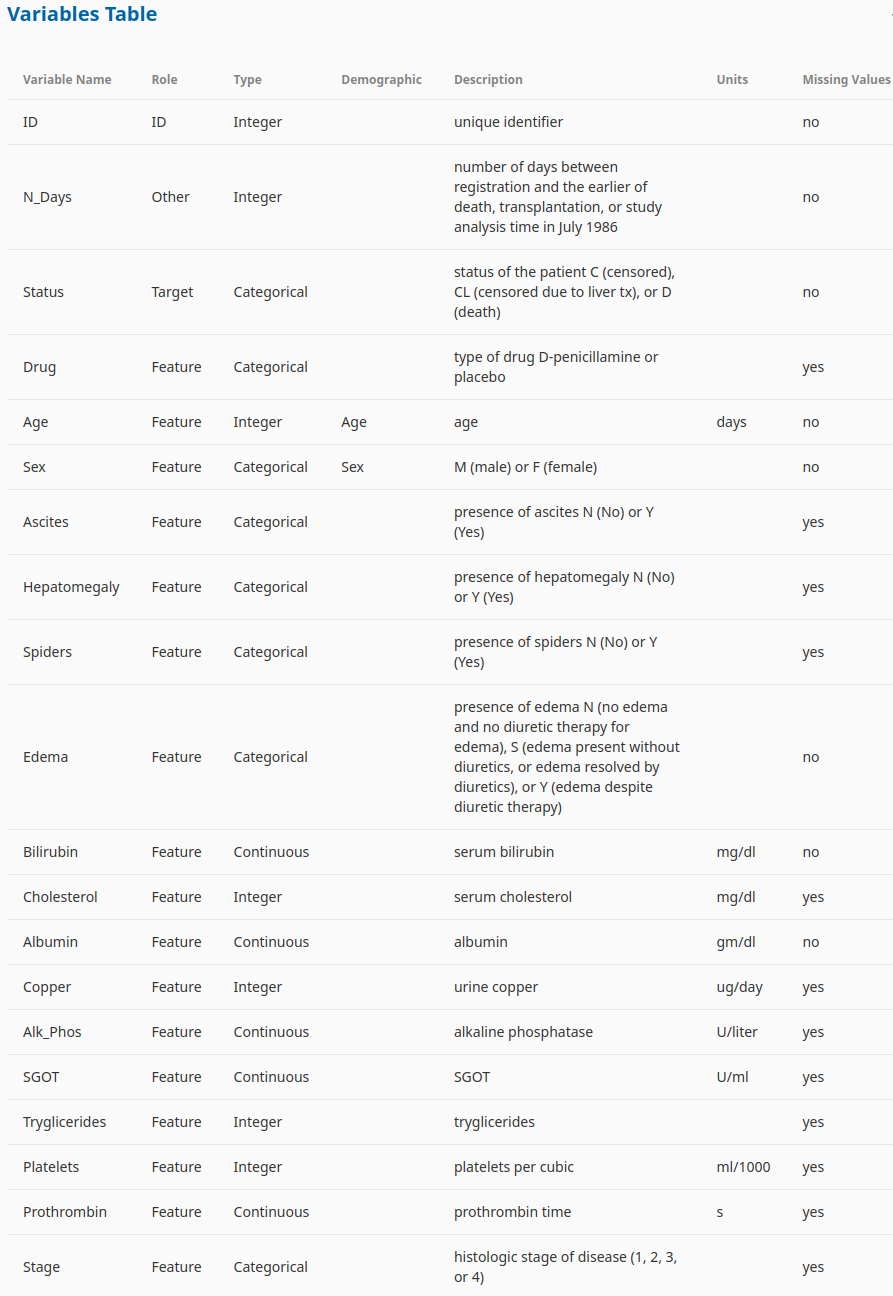Cirhossis Status Prediction

In [ ]:
# Importing required Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


## Exploratary Data Analysis

In [ ]:
df.shape

(7905, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


First we will plot every features to visualize every column and how they affect our prediction

<Axes: xlabel='Sex', ylabel='count'>

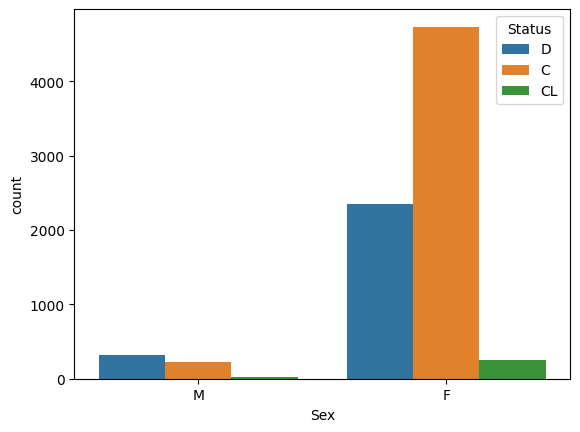

In [ ]:

# Checking which gender is more prone to cirhossis
sns.countplot(x=df['Sex'],hue=df["Status"])

 Insight:

Females are very highly prone to cirhossis.
Thus Sex is a great predicter for cirhossis.
But anather insight we can get is Men are very very highly prone to death afer affected with Cirhossis

<Axes: xlabel='Status', ylabel='count'>

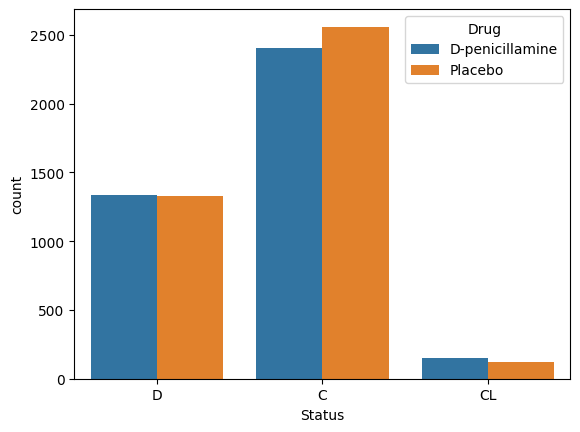

In [ ]:
# Check which drug is used in Cirhossis and what affects it resulted in.
sns.countplot(hue=df['Drug'],x=df['Status'])

Insight:

Not very insighful data... But it shows that placebo increase status C in patients i.e patient who are given placebo are slightly more expected to survive. The difference is slight thus it can also happen from complete randomness.

In [ ]:
# Lets check Status and N_Days graph

<Axes: xlabel='Status', ylabel='N_Days'>

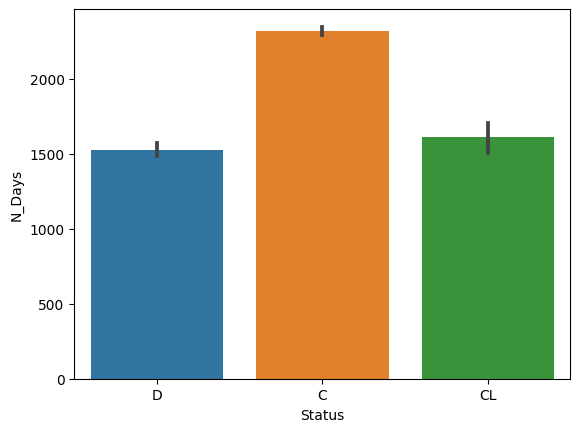

In [ ]:
sns.barplot(x=df["Status"],y=df['N_Days'])

Insights:
Here we can see that patient who survived more days affected with Cirhossis ... most probably survived the disease.

<Axes: xlabel='Status', ylabel='Age'>

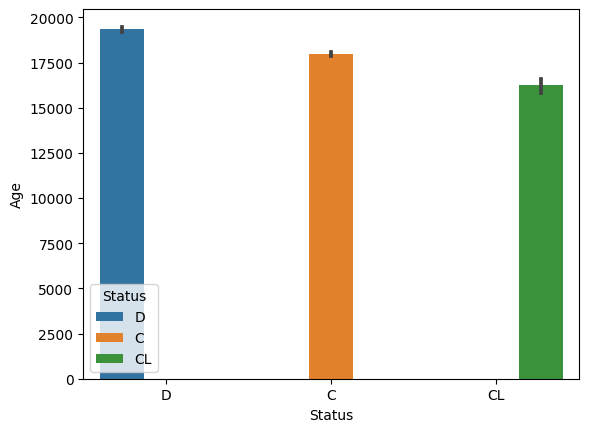

In [ ]:
# Graph of Status and Age
sns.barplot(x=df['Status'],y=df["Age"],hue=df['Status'])

Insights:

This plot shows that : Age is directly proportional to the death rate in Cirhossis.

<Axes: xlabel='Ascites', ylabel='count'>

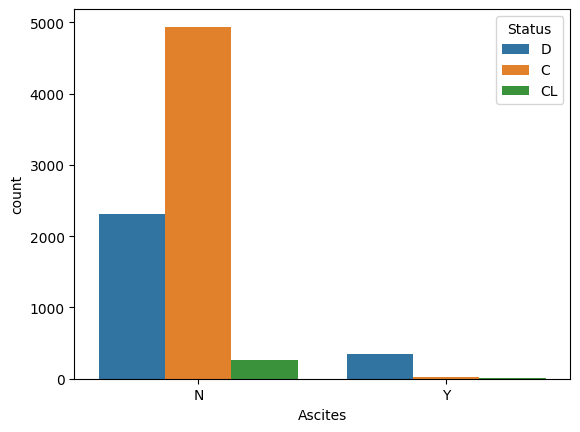

In [ ]:
# Lets check how Bilirubin affects Cirhossis
sns.countplot(x= df.Ascites,hue=df.Status)

Insights:

Almost everyone with Ascitis died after affected by cirhossis.
Patients with No Ascitis had better survival chances.

<Axes: xlabel='Hepatomegaly', ylabel='count'>

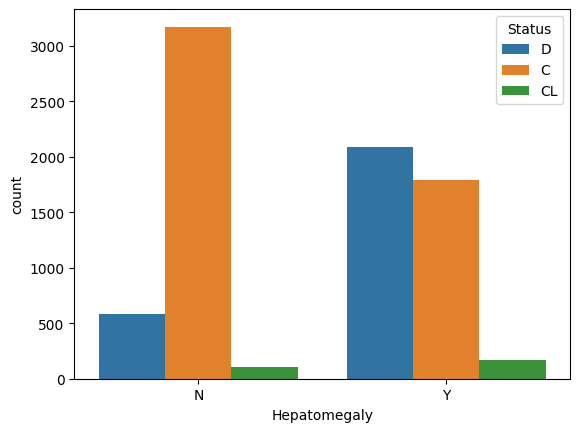

In [ ]:
# Lets check how Hepatomegaly affects Cirhossis
sns.countplot(x= df.Hepatomegaly,hue=df.Status)

Insights:

Many patient with Hepatomegaly died.
But most patient with non-Hepatomegaly survived

<Axes: xlabel='Spiders', ylabel='count'>

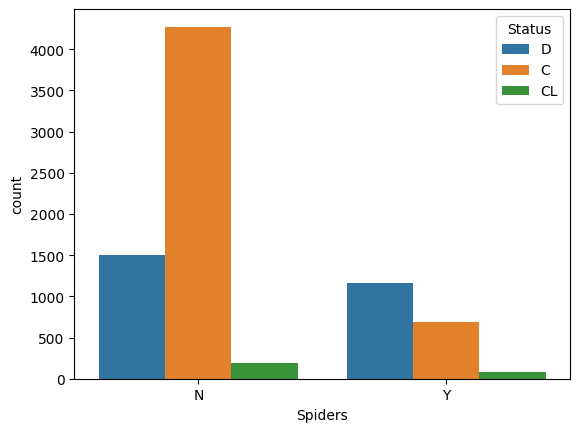

In [ ]:
#Lets check how Spiders affects Cirhossis
sns.countplot(x= df.Spiders,hue=df.Status)

Insights:

Show similar data like Hepatomegaly & Ascitis.
Many patient with it died.
But most patient with non-Spiders survived

<Axes: xlabel='Edema', ylabel='count'>

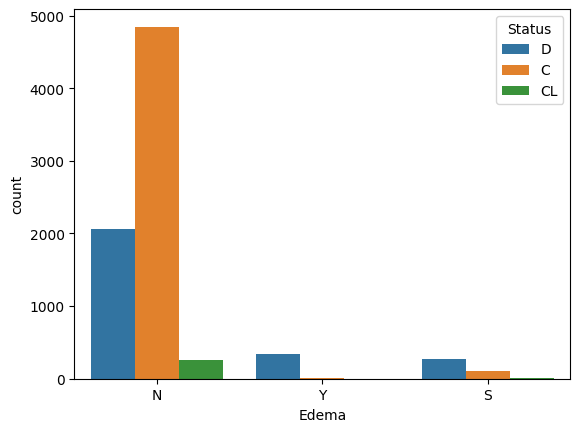

In [ ]:
#Lets check how Edema affects Cirhossis
sns.countplot(x= df.Edema,hue=df.Status)

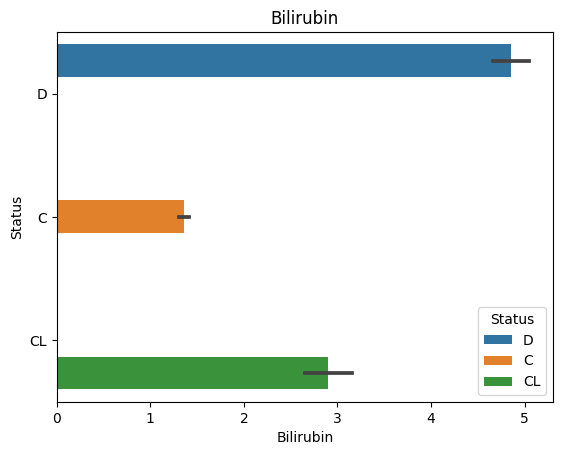

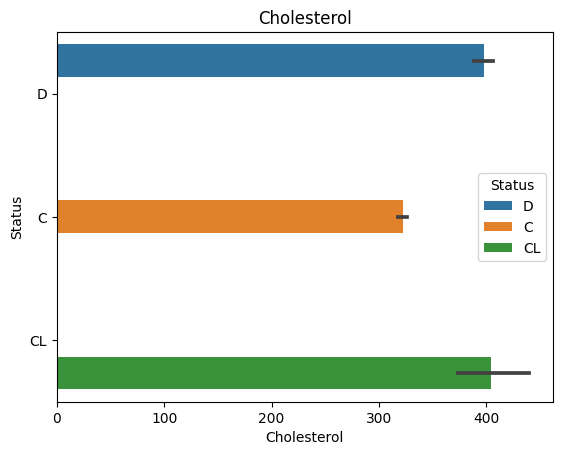

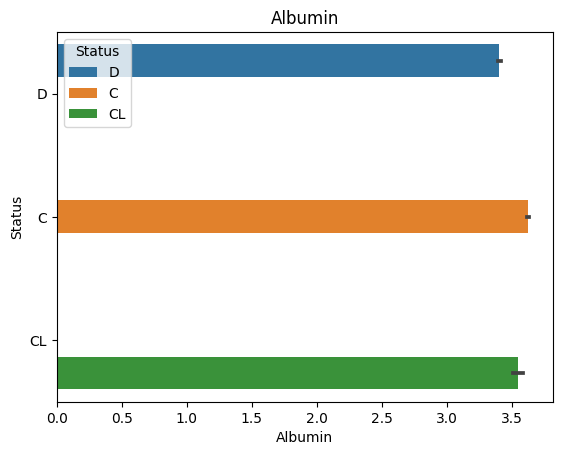

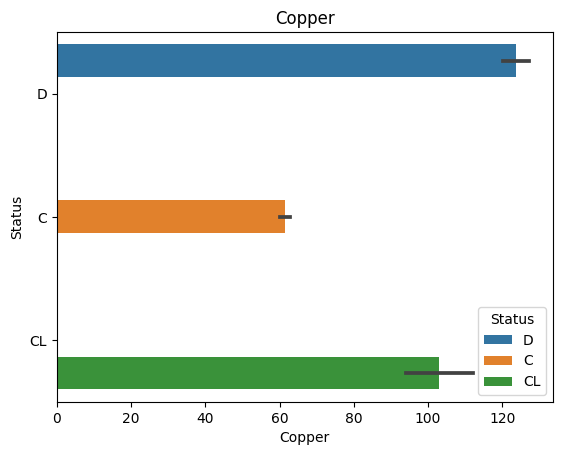

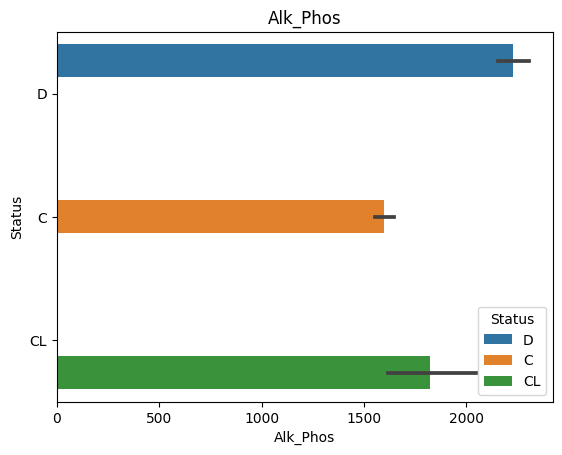

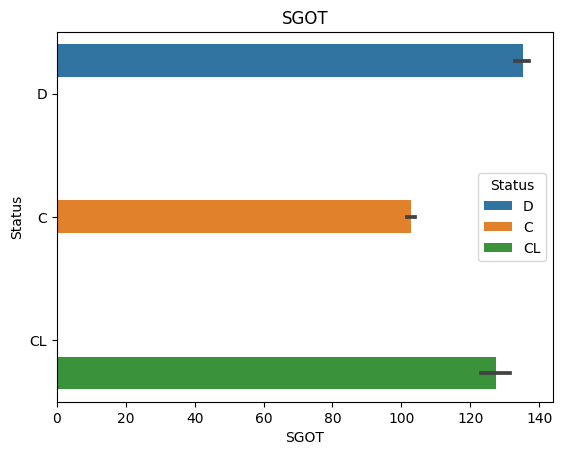

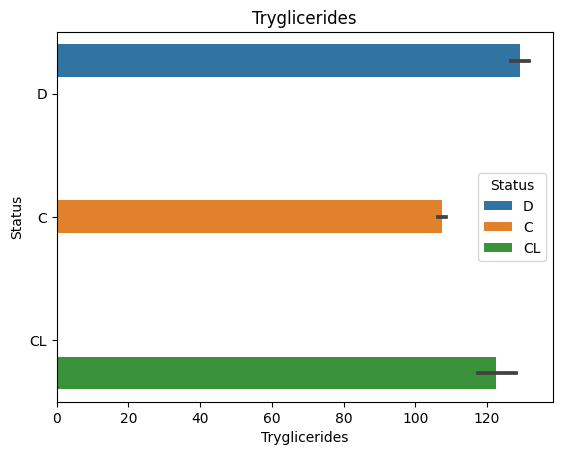

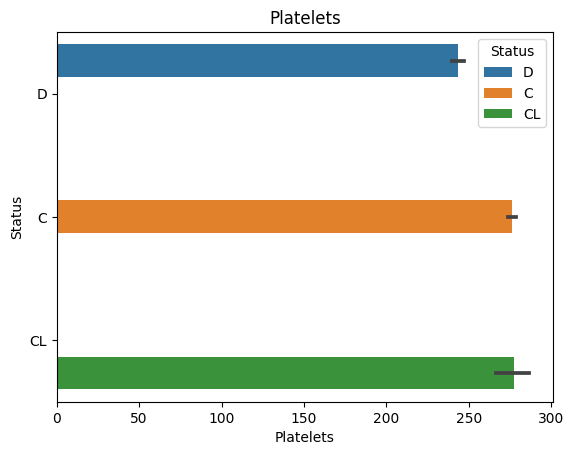

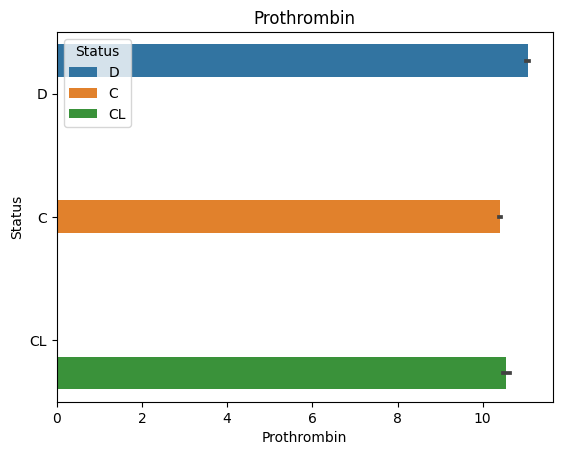

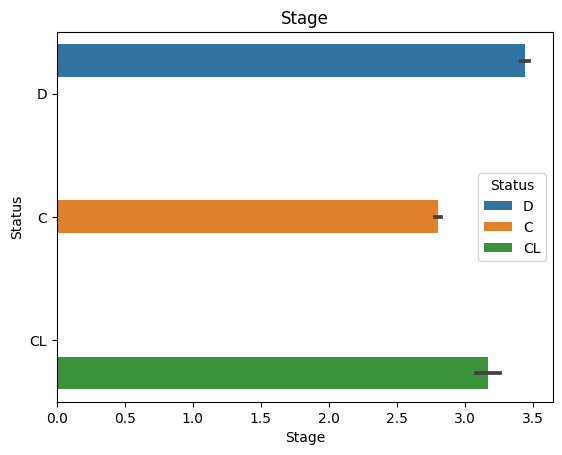

In [ ]:
# print a barplot for every colun with float datatype with its title

for i in df.columns:
  if(df[i].dtype=='float64'):
    plt.figure()
    plt.title(f'{i}')
    sns.barplot(x=df[i],y=df.Status,hue=df.Status)


Insights:

1.Bilirubbin: The death rate among patients with higher bilirubin is higher than lower bilrubbin affected with cirhossis.

2.Cholestrol: Death rate with higher cholestrol is somewhat higher in cirhossis patients. Still cholestrol dont impact greatly in death reasons for cirhosssis.

3.Albumin: Albumins have very less or no affect on Cirhossis.
The very slight change in values can be due to random sampling.

4.Copper: The cirhossis afeected-Patients with higher lvls of copper have twice death rate than patient affected with cirhossis and have less copper in their body.

5.Alk_Phos: Higher Alk Phos show in cirhossis patients show higher death rate.

6.SGOT: Higher Alk Phos show in cirhossis patients show higher death rate.

7.Triglicerids: The cirhossis afeected-Patients with higher lvls of Triglicerids have higher death rate than patient affected with cirhossis and have less Triglicerids in their body.

8.Platelets: The cirhossis patient with higher platelets have more chances of survival.

9.Prothrombin: This affects very slightly. Higher Prothrobin cause slight increase in death chances.

<Axes: xlabel='Stage', ylabel='count'>

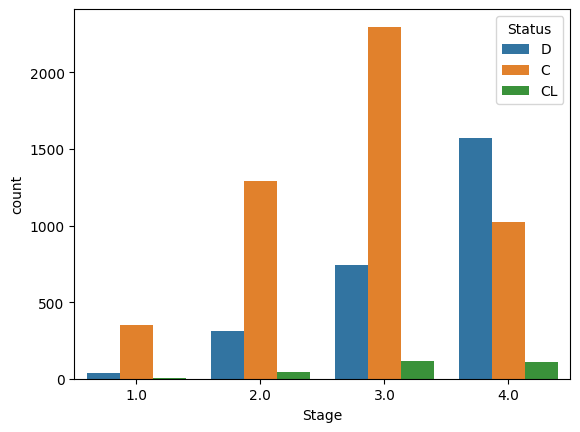

In [ ]:
sns.countplot(x=df.Stage,hue=df.Status)

Insights:

The higher categorical stage a cirhossis patient is in, the higher chances of death is there for the patients.
For ex: Lvl 4 patient have many times higher rate of death.
Lvl 1 cirhossis patients have very less death rate.

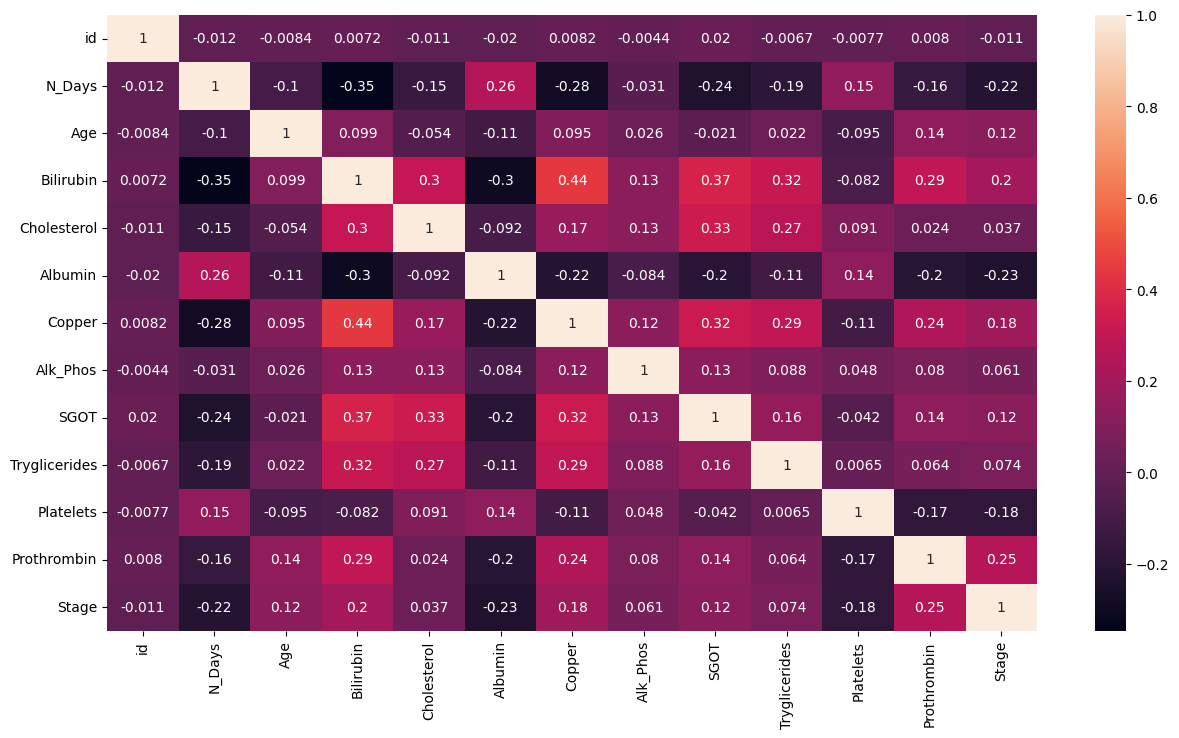

In [ ]:
# Plotting the heat map of float datatype columns in df for better visualization of corelation of datas
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


### Data Cleaning

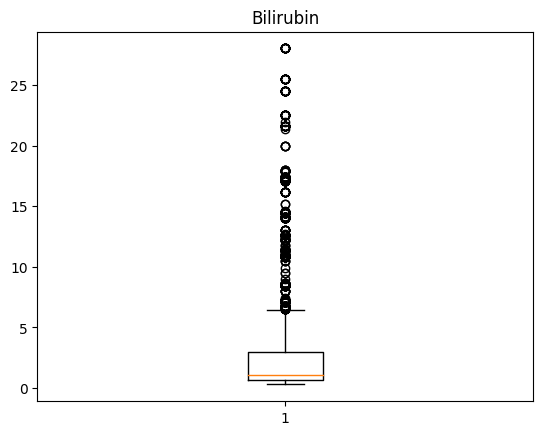

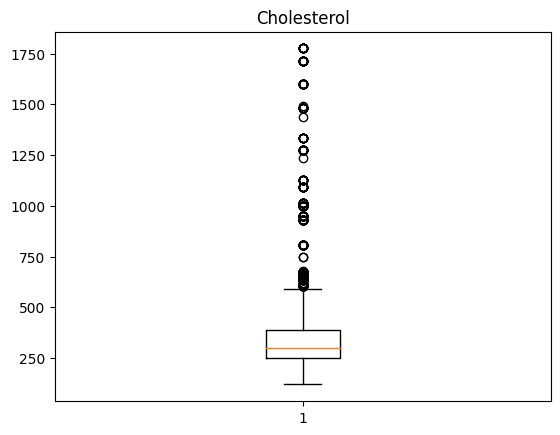

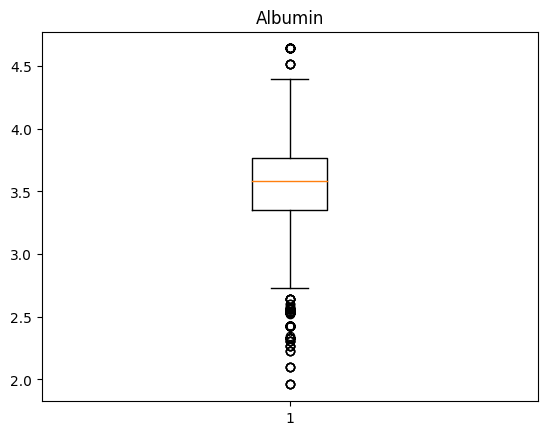

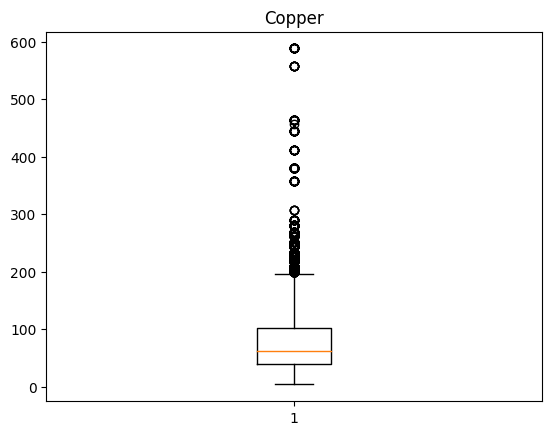

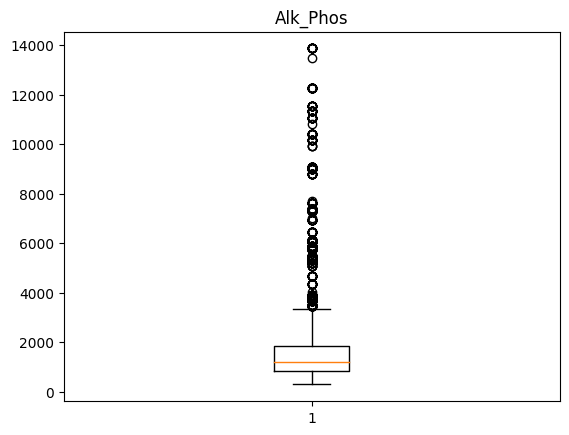

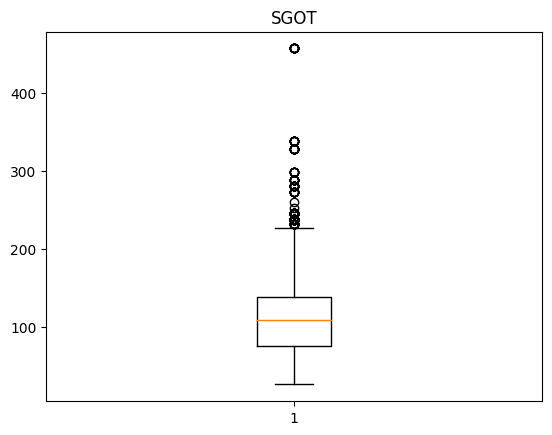

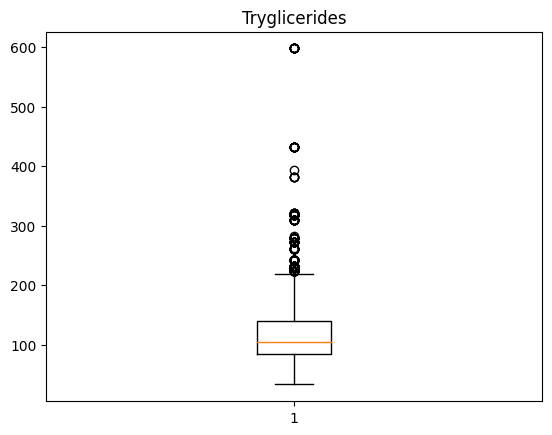

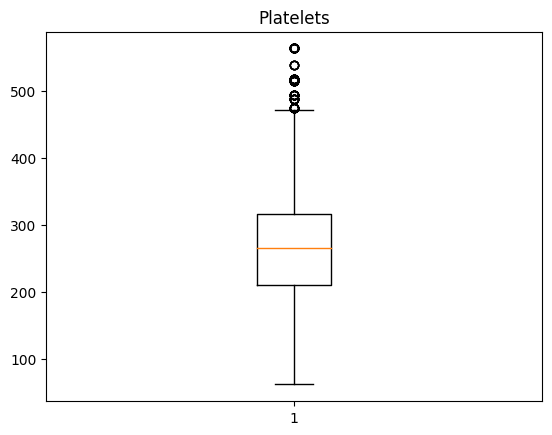

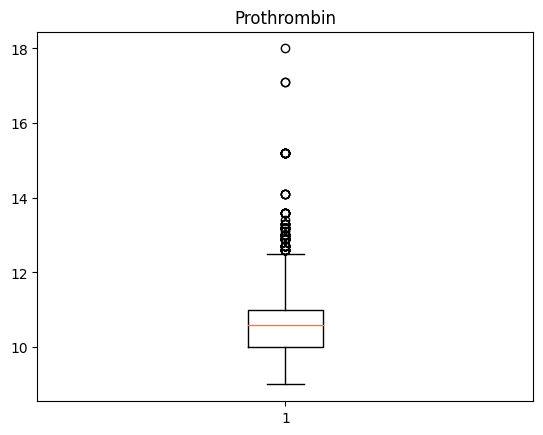

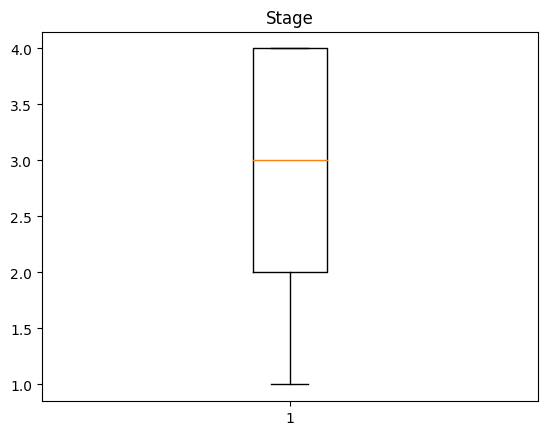

In [ ]:
# print boxplot for every column in df with ts title on top

for i in df.select_dtypes(include='float64'):
  # plt.figure()
  plt.title(f'{i}')
  plt.boxplot(df[i])
  plt.show()


In [ ]:
# Outlier Removal
def outlier_removal(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr =q3-q1
  uw = q3+1.5*iqr
  lw = q1-1.5*iqr
  return uw,lw



In [ ]:
# Getting all the float dtype columns
floats=df.select_dtypes(include='float64')
floats.columns

Index(['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
# Removing Outliers
for i in ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']:
       uw,lw = outlier_removal(df[i])
       df[i]= np.where(df[i]<lw,lw,df[i])
       df[i]= np.where(df[i]>uw,uw,df[i])

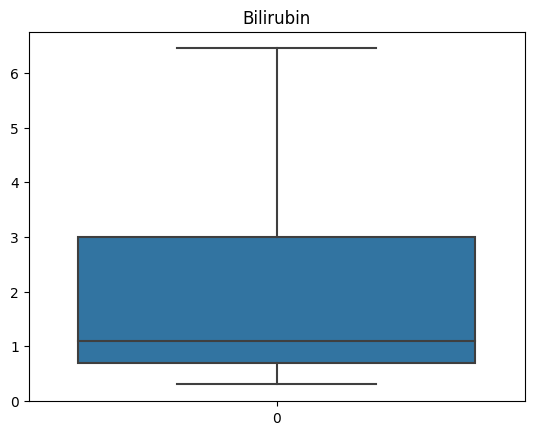

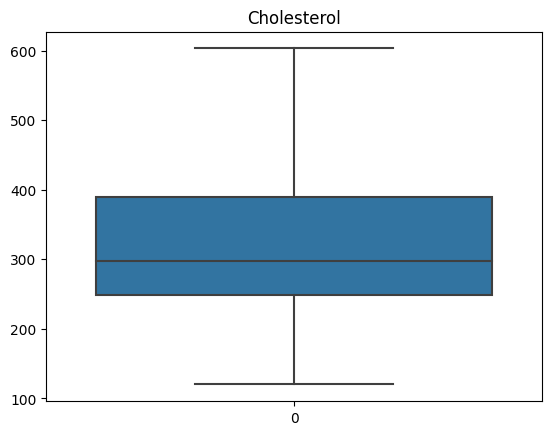

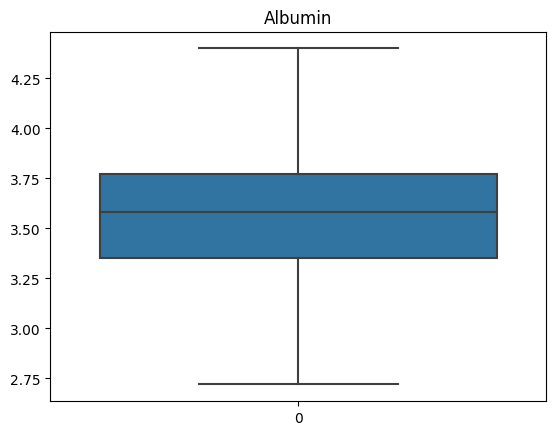

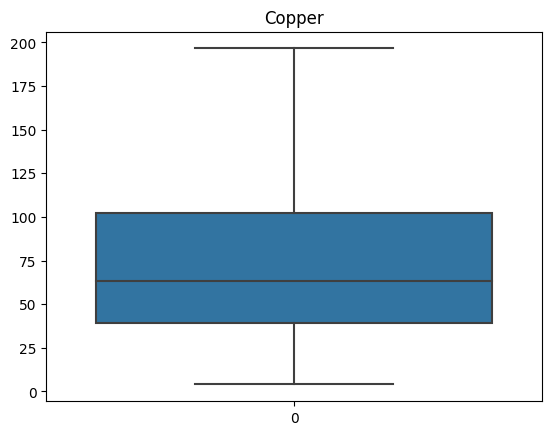

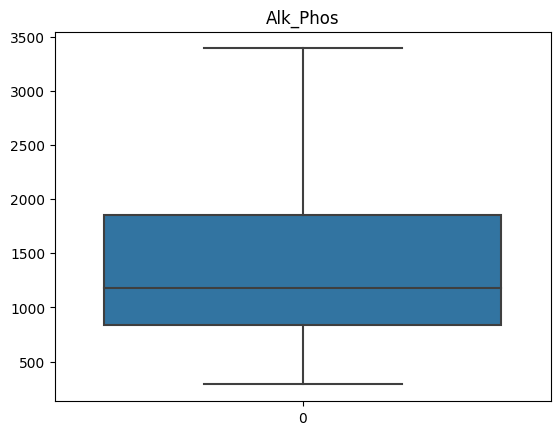

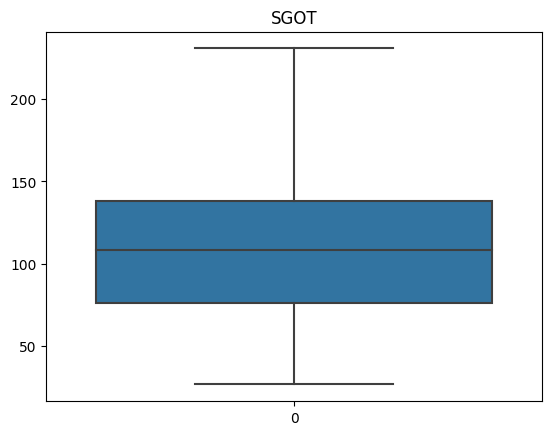

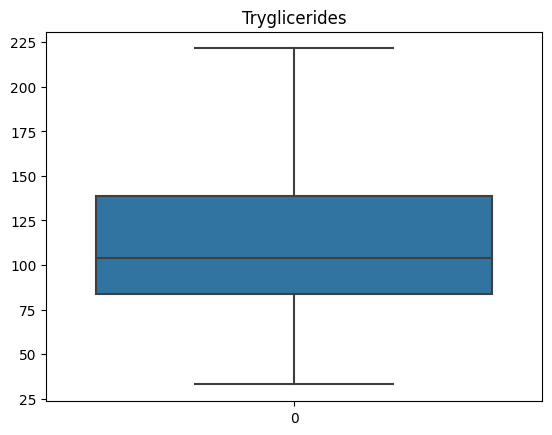

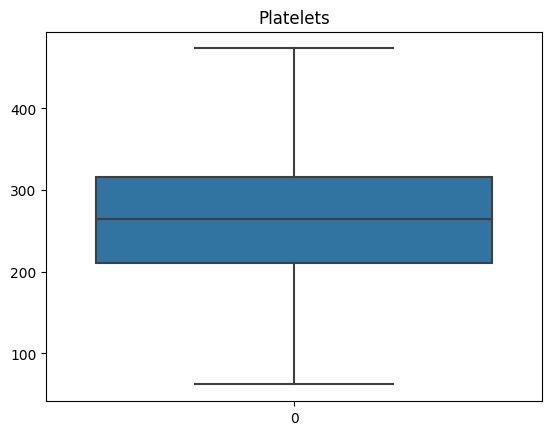

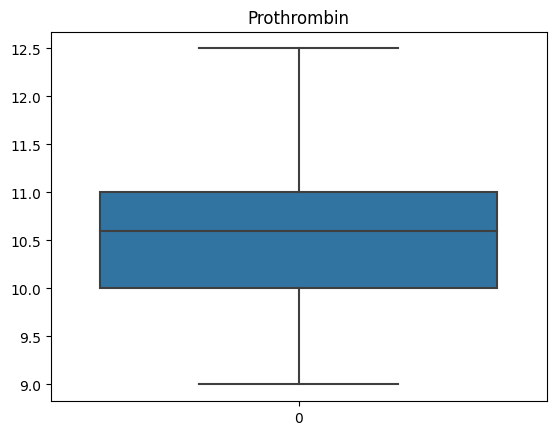

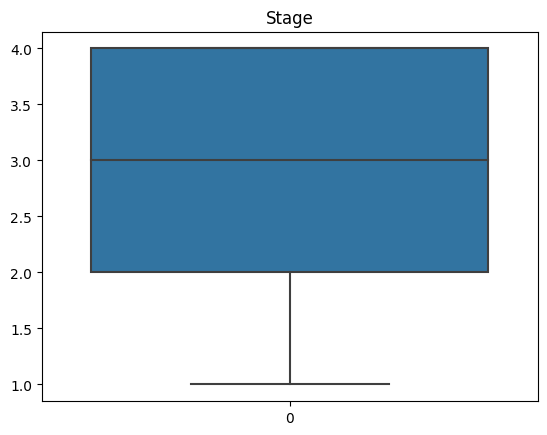

In [ ]:
# Printing boxplot with no outliers
for i in df.select_dtypes(include='float64').columns:
  plt.title(f'{i}')
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.shape

(7905, 20)

### Data Transformation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [ ]:
# Checking which columns are objects
df.select_dtypes(include=['object']).columns


Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')

In [ ]:
# There are a few object which are needed to to converted into int.
# Columns that are object = Drug , Sex , Ascites ,Hepatomegaly, Spiders,Edema ,Status

In [ ]:
label = LabelEncoder()

In [ ]:
df.Status=label.fit_transform(df.Status)
df.Hepatomegaly = label.fit_transform(df.Hepatomegaly)
df.Spiders = label.fit_transform(df.Spiders)

In [ ]:
#apply label encoder to every column with object data type

label = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col] = label.fit_transform(df[col])


In [ ]:
# Lets convert the dtype of all the object class into int
objects = [df.Spiders,df.Hepatomegaly,df.Status,df.Edema,df.Ascites,df.Sex,df.Drug]


### Feature Scaling

In [ ]:

for i in floats.columns:
  df[i]=df[i]/df[i].max()


In [ ]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,0,0.356589,0.524046,0.761364,0.875318,0.472063,0.778523,0.284424,0.832101,0.776,0.75,2
1,1,2574,1,19237,0,0,0,0,0,0.139535,0.603648,0.804545,0.320611,0.424591,0.583893,0.397291,0.762408,0.880,0.75,0
2,2,3428,1,13727,0,0,1,1,2,0.511628,0.495854,0.806818,0.666667,0.303406,0.516779,0.225734,0.420275,0.936,1.00,2
3,3,2576,1,18460,0,0,0,0,0,0.093023,0.424544,0.795455,0.295165,0.487395,0.308725,0.433409,0.568110,0.856,0.75,0
4,4,788,1,16658,0,0,1,0,0,0.170543,0.573798,0.829545,0.320611,0.348223,0.543624,0.433409,0.629356,0.848,1.00,0


### Splitting of datasets

In [ ]:
x= df.drop(['Status','id'],axis= 1)


In [ ]:
y = df['Status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

### Model Formation

In [ ]:
# Lets experiment with 2 best fitting model in this dataset

In [ ]:
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier()

In [ ]:
log_model.fit(x_train, y_train)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("The Log model' accuracy :",round(log_model.score(x_test,y_test)*100),"%")
print("The Decision Tree Model ' accuracy :",round(tree_model.score(x_test,y_test)*100),"%")

The Log model' accuracy : 78 %
The Decision Tree Model ' accuracy : 73 %


In [ ]:
# We can noticed that Log Model have significant higher prediction acuuracy than Decision Tree Model.
# Thus we can use Log model for prediction

<Axes: >

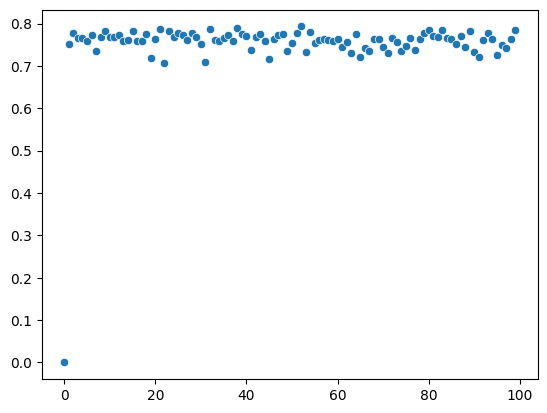

In [ ]:

i=0
score_list=[0]
while i<99:
  x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
  log_model = LogisticRegression()
  log_model.fit(x_train, y_train)

  score=log_model.score(x_test,y_test)
  score_list.append(score)
  i+=1
sns.scatterplot(score_list)


In [ ]:
# max accuracy in score_list
print("highest accuracy value after 100 time running the model=",np.max(score_list)*100,"%")


highest accuracy value after 100 time running the model= 79.31688804554081 %


In [ ]:
# Lets now have somme more detailed description of our predictions
y_pred = log_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,precision_score,accuracy_score,recall_score,f1_score,log_loss
# metrics
accuracy=accuracy_score(y_test,y_pred)

precision=precision_score(y_test,y_pred, average='weighted')

recall=recall_score(y_test,y_pred, average='weighted')

f1=f1_score(y_test,y_pred, average='weighted')

metrics=[accuracy,precision,recall,f1]


print("Acuuracy score:",round(accuracy*100) ,"%\n"
     "Precision score:",round(precision*100),"%\n"
     "Recall score:",round(recall*100),"%\n"
     "F1 score:",round(f1*100),"%")

report=classification_report(y_test,y_pred)

print("                   ***CLASSIFIACATION REPORT***")
print('')
print(report)

Acuuracy score: 78 %
Precision score: 76 %
Recall score: 78 %
F1 score: 77 %
                   ***CLASSIFIACATION REPORT***

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       994
           1       0.00      0.00      0.00        49
           2       0.73      0.66      0.70       538

    accuracy                           0.78      1581
   macro avg       0.51      0.52      0.51      1581
weighted avg       0.76      0.78      0.77      1581




1. **Accuracy Score**: It is the ratio of the number of correct predictions to the total number of input samples. It works well only if there are equal number of samples belonging to each class.

2. **Precision Score**: It is the ratio of the number of true positives to the sum of true positives and false positives. It shows how precise (how sure) your model is of its predicted positives.

3. **Recall Score**: Also known as sensitivity, hit rate, or true positive rate. It is the ratio of the number of true positives to the sum of true positives and false negatives. It shows how many of the actual positives your model capture through labeling it as positive.

4. **F1 Score**: It is the harmonic mean of Precision and Recall and tries to find the balance between precision and recall.



Source:

(1) How to Calculate Precision, Recall, F1, and More for Deep Learning .... https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/.
(2) Confusion Matrix, Accuracy, Precision, Recall, F1 Score. https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd.
(3) What is and When to use precession, recall and f1 score. https://medium.com/@chandradip93/what-is-and-when-to-use-precession-recall-and-f1-score-884403ee525e.
(4) What is precision, Recall, Accuracy and F1-score? - Nomidl. https://www.nomidl.com/machine-learning/what-is-precision-recall-accuracy-and-f1-score/.

In [ ]:
# metrics
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
f1=f1_score(y_test,y_pred, average='weighted')
metrics=[accuracy,precision,recall,f1]

<Axes: >

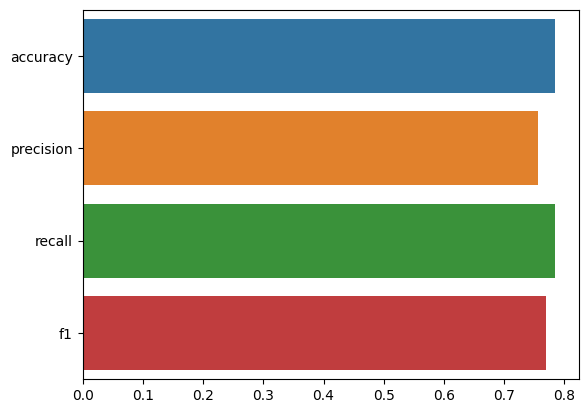

In [ ]:
# Lets plot the metrics in a graph
sns.barplot(x=metrics,y=['accuracy','precision','recall','f1'])


In [ ]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import label_binarize

# Convert y_test and y_pred to binary arrays
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Calculate the log loss
logloss = log_loss(y_test_bin, y_pred_bin)

print("Log loss:", logloss)

Log loss: 7.774121319221347
